In [2]:
## Downloading the datasets
!wget -O jena_climate_2009_2016.csv.zip https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
## Imports
import os
import numpy as np
import matplotlib.pyplot as plt 

In [16]:
data_dir = r"F:\Development\DataScience\Course\time_series_analysis\jena_climate"
fname  = os.path.join(data_dir, "jena_climate_2009_2016.csv")
f = open(fname)
data = f.read()
f.close()

lines   = data.split('\n')
header  = lines[0].split(",")
lines   = lines[1:]
print(header)
print(len(header))
print(len(lines))


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
15
420451


In [17]:
lines[0]

'01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30'

In [19]:
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x  in line.split(",")[1:]]
    float_data[i,:] = values
    

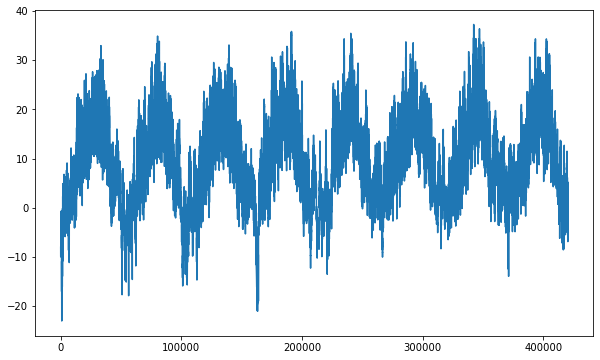

In [30]:
## Plotting the temperature timeseries
temp = float_data[:, 1]
plt.figure(figsize=(10,6))
plt.plot(range(len(temp)),  temp)
plt.show()


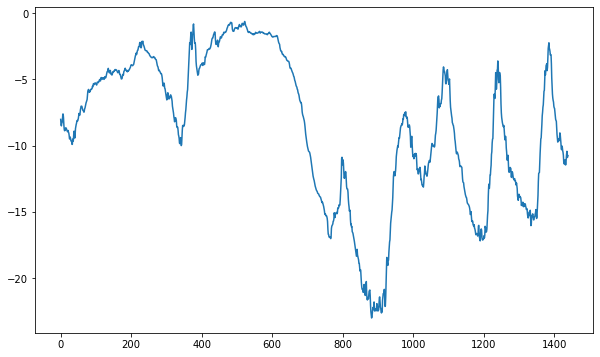

In [31]:
### Plotting the first 10 days of the temperature timeseries
temp = float_data[:1440, 1]
plt.figure(figsize=(10, 6))
plt.plot(range(len(temp)),  temp)
plt.show()

In [ ]:
## Mean Normalization followd by STD of the data points to have small values on a similar scale
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std